<a href="https://colab.research.google.com/github/AdminGirl/Online-Education-Flexibility-Level-Prediction/blob/main/Online_Education_Flexilbility_Level_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.metrics import accuracy_score
from google.colab import drive

/usr/local/lib/python3.7/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# **Data Processing**

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/DSF-Project/students_adaptability_level_online_education.csv')
df.head()


,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [ ]:
#Checking Shape
df.shape

(1205, 14)

In [ ]:
df.Location.unique()

array(['Yes', 'No'], dtype=object)

In [ ]:

#Renaming Columns with inplace
df.rename(columns = {"Adaptivity Level":"Flexibility_Level","Self Lms":"Self_Lms"},inplace=True) 
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self_Lms,Device,Flexibility_Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [ ]:
#replacing columns name
df.replace("Boy","Male",inplace=True)
df.replace("Girl","Female",inplace=True)
df.replace("Mid","Middle Class",inplace=True)
df.replace("Poor","Lower Class",inplace=True)
df.replace("Rich","Upper Class",inplace=True)
df.Location.replace("Yes","City",inplace=True)
df.Location.replace("No","Rural Area",inplace=True)


In [ ]:
#dropping columns
df.drop(["Self_Lms"],axis=1, inplace=True)
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Device,Flexibility_Level
0,Male,21-25,University,Non Government,No,Yes,Low,Middle Class,Wifi,4G,3-6,Tab,Moderate
1,Female,21-25,University,Non Government,No,Yes,High,Middle Class,Mobile Data,4G,1-3,Mobile,Moderate
2,Female,16-20,College,Government,No,Yes,Low,Middle Class,Wifi,4G,1-3,Mobile,Moderate
3,Female,11-15,School,Non Government,No,Yes,Low,Middle Class,Mobile Data,4G,1-3,Mobile,Moderate
4,Female,16-20,School,Non Government,No,Yes,Low,Lower Class,Mobile Data,3G,0,Mobile,Low


In [ ]:
#Checking Shape
df.shape

(1205, 13)

In [ ]:
df.isnull().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Device                 0
Flexibility_Level      0
dtype: int64

In [ ]:
#Checking null values
df.isnull().values.any()

False

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Device               1205 non-null   object
 12  Flexibility_Level    1205 non-null   object
dtypes: object(13)
memory usage: 122.5+ KB


In [ ]:
df.Location.unique()

array(['City', 'Rural Area'], dtype=object)

In [ ]:
dff=df

In [ ]:
dff.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Device,Flexibility_Level
0,Male,21-25,University,Non Government,No,City,Low,Middle Class,Wifi,4G,3-6,Tab,Moderate
1,Female,21-25,University,Non Government,No,City,High,Middle Class,Mobile Data,4G,1-3,Mobile,Moderate
2,Female,16-20,College,Government,No,City,Low,Middle Class,Wifi,4G,1-3,Mobile,Moderate
3,Female,11-15,School,Non Government,No,City,Low,Middle Class,Mobile Data,4G,1-3,Mobile,Moderate
4,Female,16-20,School,Non Government,No,City,Low,Lower Class,Mobile Data,3G,0,Mobile,Low


In [ ]:
#since the age comes as a range and is a string, python will automatically sort by alphabetical order
#to be able to sort numerically,id split the range and use the lower limit instead 
col1 = dff["Age"].apply(lambda x: x.split("-")[0])
dff = dff.join(col1.to_frame(name="Age Range"))
dff.drop(['Age'], axis = 1, inplace = True)
dff

,Gender,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Device,Flexibility_Level,Age Range
0,Male,University,Non Government,No,City,Low,Middle Class,Wifi,4G,3-6,Tab,Moderate,21
1,Female,University,Non Government,No,City,High,Middle Class,Mobile Data,4G,1-3,Mobile,Moderate,21
2,Female,College,Government,No,City,Low,Middle Class,Wifi,4G,1-3,Mobile,Moderate,16
3,Female,School,Non Government,No,City,Low,Middle Class,Mobile Data,4G,1-3,Mobile,Moderate,11
4,Female,School,Non Government,No,City,Low,Lower Class,Mobile Data,3G,0,Mobile,Low,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Female,College,Non Government,No,City,Low,Middle Class,Wifi,4G,1-3,Mobile,Low,16
1201,Female,College,Non Government,No,Rural Area,High,Middle Class,Wifi,4G,3-6,Mobile,Moderate,16
1202,Male,School,Non Government,No,City,Low,Middle Class,Mobile Data,3G,1-3,Mobile,Moderate,11
1203,Female,College,Non Government,No,Rural Area,Low,Middle Class,Wifi,4G,1-3,Mobile,Low,16


In [ ]:
#converting object to int
dff['Age Range'] = dff['Age Range'].astype(int)

In [ ]:
#to be able to sort numerically,id split the range and use the lower limit instead 
col1 = dff["Class Duration"].apply(lambda x: x.split("-")[0])
dff = dff.join(col1.to_frame(name="Class_duration"))
dff.drop(['Class Duration'], axis = 1, inplace = True)
dff

,Gender,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Device,Flexibility_Level,Age Range,Class_duration
0,Male,University,Non Government,No,City,Low,Middle Class,Wifi,4G,Tab,Moderate,21,3
1,Female,University,Non Government,No,City,High,Middle Class,Mobile Data,4G,Mobile,Moderate,21,1
2,Female,College,Government,No,City,Low,Middle Class,Wifi,4G,Mobile,Moderate,16,1
3,Female,School,Non Government,No,City,Low,Middle Class,Mobile Data,4G,Mobile,Moderate,11,1
4,Female,School,Non Government,No,City,Low,Lower Class,Mobile Data,3G,Mobile,Low,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Female,College,Non Government,No,City,Low,Middle Class,Wifi,4G,Mobile,Low,16,1
1201,Female,College,Non Government,No,Rural Area,High,Middle Class,Wifi,4G,Mobile,Moderate,16,3
1202,Male,School,Non Government,No,City,Low,Middle Class,Mobile Data,3G,Mobile,Moderate,11,1
1203,Female,College,Non Government,No,Rural Area,Low,Middle Class,Wifi,4G,Mobile,Low,16,1


In [ ]:
#converting object to int
dff['Class_duration'] = dff['Class_duration'].astype(int)

In [ ]:
dff.head()

,Gender,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Device,Flexibility_Level,Age Range,Class_duration
0,Male,University,Non Government,No,City,Low,Middle Class,Wifi,4G,Tab,Moderate,21,3
1,Female,University,Non Government,No,City,High,Middle Class,Mobile Data,4G,Mobile,Moderate,21,1
2,Female,College,Government,No,City,Low,Middle Class,Wifi,4G,Mobile,Moderate,16,1
3,Female,School,Non Government,No,City,Low,Middle Class,Mobile Data,4G,Mobile,Moderate,11,1
4,Female,School,Non Government,No,City,Low,Lower Class,Mobile Data,3G,Mobile,Low,16,0


In [ ]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Education Level      1205 non-null   object
 2   Institution Type     1205 non-null   object
 3   IT Student           1205 non-null   object
 4   Location             1205 non-null   object
 5   Load-shedding        1205 non-null   object
 6   Financial Condition  1205 non-null   object
 7   Internet Type        1205 non-null   object
 8   Network Type         1205 non-null   object
 9   Device               1205 non-null   object
 10  Flexibility_Level    1205 non-null   object
 11  Age Range            1205 non-null   int64 
 12  Class_duration       1205 non-null   int64 
dtypes: int64(2), object(11)
memory usage: 122.5+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [ ]:
#label encoding 

label_encoders = {}
categorical_columns = dff.columns  # I would recommend using columns names here if you're using pandas. If you're using numpy then stick with range(n) instead

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    dff[column] = label_encoders[column].fit_transform(dff[column])

In [ ]:
dff.head()

,Gender,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Device,Flexibility_Level,Age Range,Class_duration
0,1,2,1,0,0,1,1,1,2,2,2,4,2
1,0,2,1,0,0,0,1,0,2,1,2,4,1
2,0,0,0,0,0,1,1,1,2,1,2,3,1
3,0,1,1,0,0,1,1,0,2,1,2,2,1
4,0,1,1,0,0,1,0,0,1,1,1,3,0


In [ ]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               1205 non-null   int64
 1   Education Level      1205 non-null   int64
 2   Institution Type     1205 non-null   int64
 3   IT Student           1205 non-null   int64
 4   Location             1205 non-null   int64
 5   Load-shedding        1205 non-null   int64
 6   Financial Condition  1205 non-null   int64
 7   Internet Type        1205 non-null   int64
 8   Network Type         1205 non-null   int64
 9   Device               1205 non-null   int64
 10  Flexibility_Level    1205 non-null   int64
 11  Age Range            1205 non-null   int64
 12  Class_duration       1205 non-null   int64
dtypes: int64(13)
memory usage: 122.5 KB


In [ ]:
#Importing the basic librarires for building the models 

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,r2_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from inspect import signature





# Graphs

In [ ]:
dff.describe()

,Gender,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Device,Flexibility_Level,Age Range,Class_duration
count,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000
mean,0.550207,1.196680,0.682988,0.252282,0.224066,0.833195,0.869710,0.423237,1.627386,0.890456,1.435685,2.843983,1.047303
std,0.497679,0.722437,0.465506,0.434503,0.417139,0.372956,0.504584,0.494277,0.515295,0.384003,0.642013,1.257096,0.548559
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000
50%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,2.000000,3.000000,1.000000
75%,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,4.000000,1.000000
max,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,5.000000,2.000000


**Data Describe**

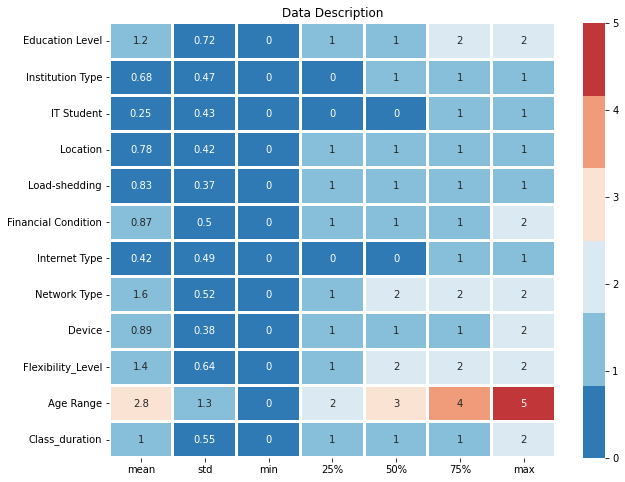

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(dff.describe()[1:].transpose(),
            annot=True,linecolor="w",
            linewidth=2,cmap=sns.color_palette("RdBu_r"))
plt.title("Data Description")
plt.show()

**Correlation**

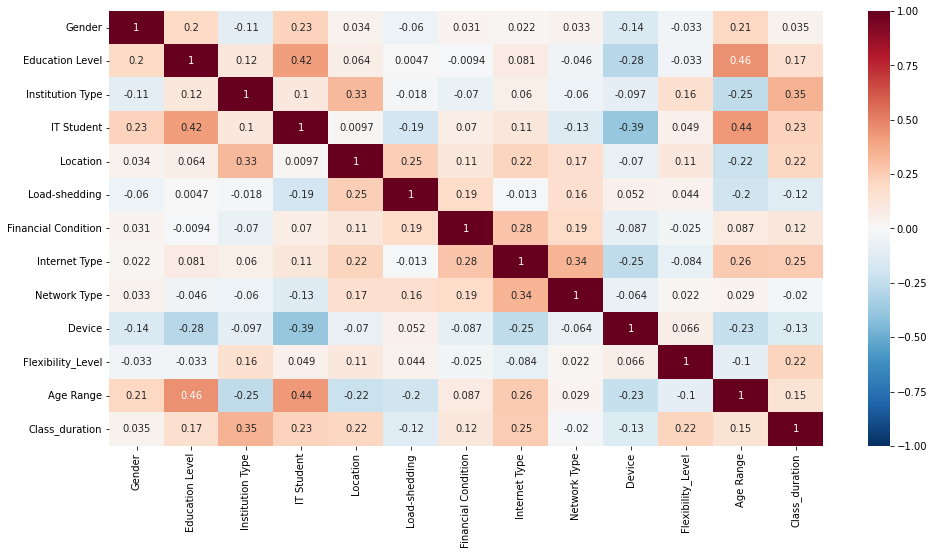

In [ ]:
#Generating Heatmap
correlation = dff.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")
plt.show()

In [ ]:
dff.columns

Index(['Gender', 'Education Level', 'Institution Type', 'IT Student',
       'Location', 'Load-shedding', 'Financial Condition', 'Internet Type',
       'Network Type', 'Device', 'Flexibility_Level', 'Age Range',
       'Class_duration'],
      dtype='object')

In [ ]:
feature =['Gender', 'Education Level', 'Institution Type', 'IT Student',
       'Location', 'Load-shedding', 'Financial Condition', 'Internet Type',
       'Network Type', 'Device', 'Age Range',
       'Class_duration']

In [ ]:
list(enumerate(feature))

[(0, 'Gender'),
 (1, 'Education Level'),
 (2, 'Institution Type'),
 (3, 'IT Student'),
 (4, 'Location'),
 (5, 'Load-shedding'),
 (6, 'Financial Condition'),
 (7, 'Internet Type'),
 (8, 'Network Type'),
 (9, 'Device'),
 (10, 'Age Range'),
 (11, 'Class_duration')]

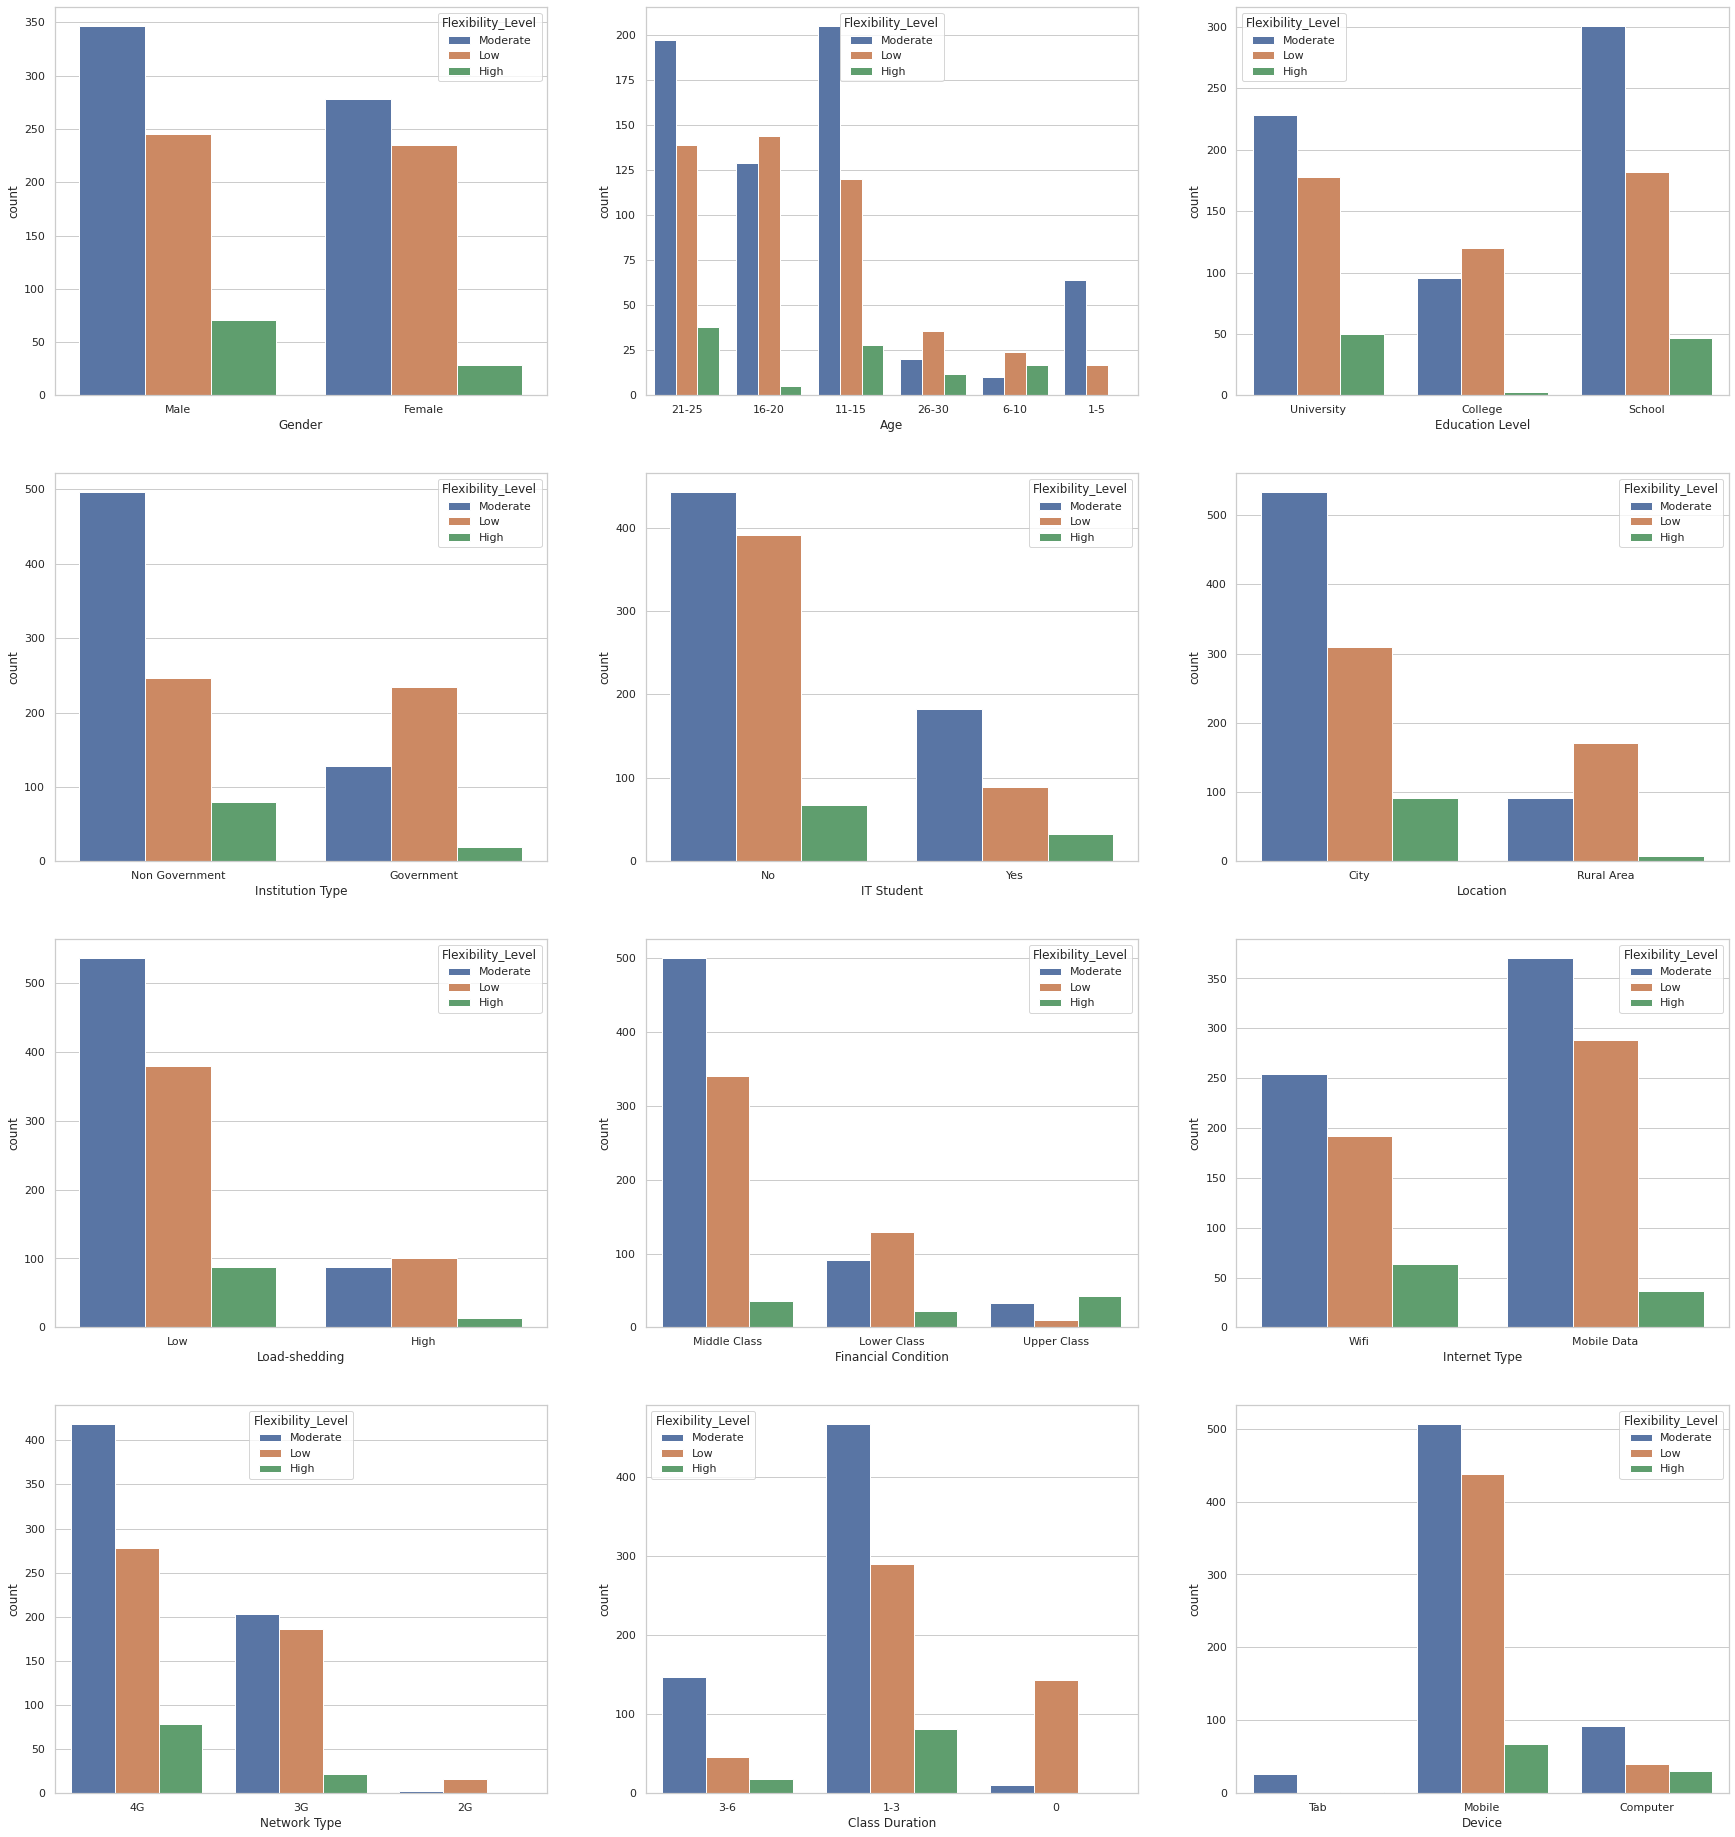

In [ ]:
#To create barplot visualizations for the different categories 
i = 1
plt.figure(figsize = (30,50))
for feature in [col for col in df.columns if col!='Flexibility_Level' ]:
    plt.subplot(6,3,i),  
    sns.countplot(x = feature , hue='Flexibility_Level' ,data = df,)
 
    i +=1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


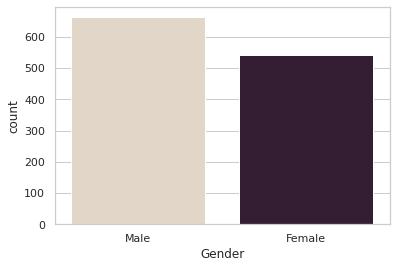

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


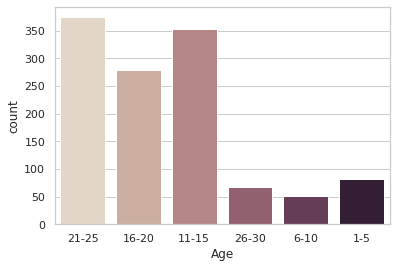

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


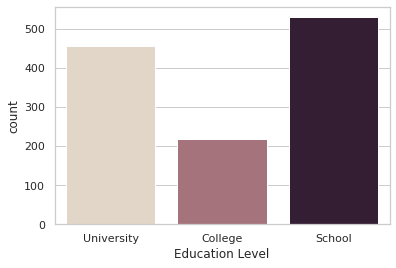

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


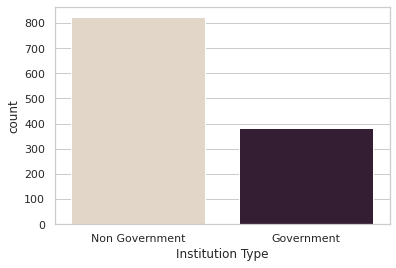

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


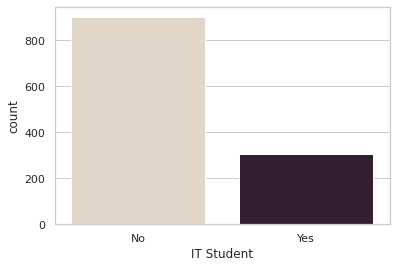

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


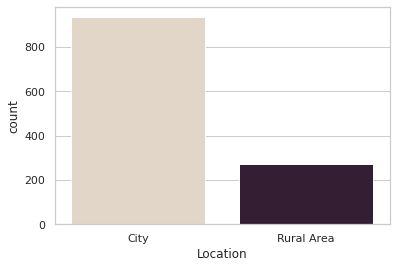

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


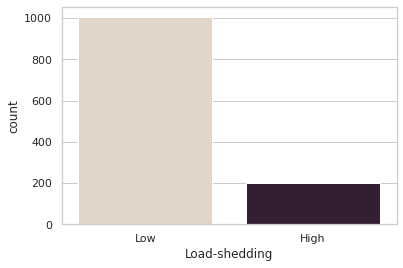

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


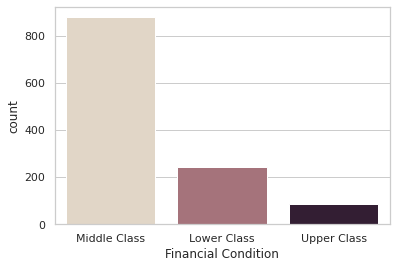

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


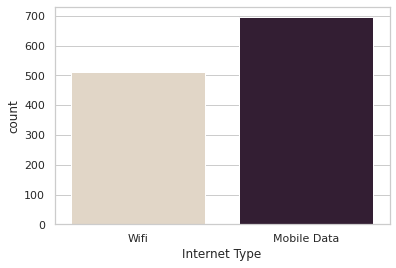

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


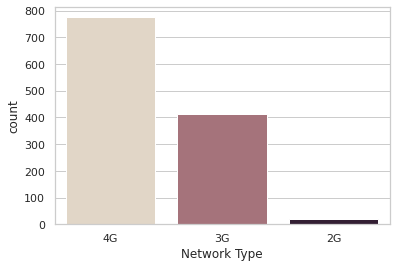

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


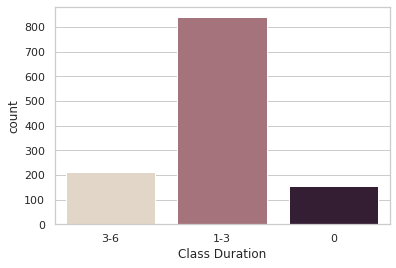

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


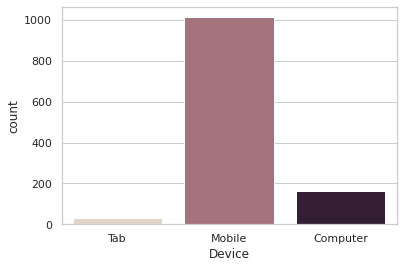

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


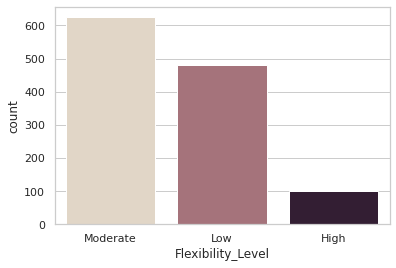

In [ ]:
for col in df.columns:
    sns.countplot(df[col],palette="ch:.25")
    plt.show()

**Age distribution**

In [ ]:
fig = px.histogram(df, x="Age",color_discrete_sequence =['orange']*len(df),height=400)
fig.show()

**Age distribution with Gender**

In [ ]:
fig = px.histogram(df, x="Age", color="Gender",color_discrete_sequence=px.colors.diverging.Spectral, height=400)
fig.show()

In [ ]:
import plotly.express as px

**Flexibility Level Distribution**

In [ ]:
fig = px.histogram(df, x="Flexibility_Level",color_discrete_sequence =['orange']*len(df),height=400)
fig.show()

**Class Duration Distribution with Flexibility Level**

In [ ]:
fig = px.histogram(df, x="Class Duration",
             color='Flexibility_Level', barmode='group',
              height=400,color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

**IT Student Distribution**

In [ ]:
fig = px.histogram(df, x="IT Student",color_discrete_sequence =['crimson']*len(df),height=400)
fig.show()

**IT Student Distribution with Device**

In [ ]:
fig = px.histogram(df, x="IT Student",color="Device", height=400,color_discrete_sequence=px.colors.qualitative.G10, barmode='group')
fig.show()

In [ ]:
df.columns.unique()

Index(['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student',
       'Location', 'Load-shedding', 'Financial Condition', 'Internet Type',
       'Network Type', 'Class Duration', 'Device', 'Flexibility_Level'],
      dtype='object')

**Education Level Distribution**

In [ ]:
fig = px.histogram(df, x="Education Level",color_discrete_sequence =['navy']*len(df),height=400)
fig.show()

**Percentage of Institution Type **

In [ ]:
fig = px.pie(df, names='Institution Type', color_discrete_sequence=['#D81E1F','#0D3383'],width=500)
fig.update_layout(title='Institution Type%')
fig.show()

**Internet Type Distribution**

In [ ]:
fig = px.histogram(df, x="Internet Type",color_discrete_sequence =['navy']*len(df),height=400)
fig.show()

**Network Type Percentage**

In [ ]:
fig = px.pie(df, names='Network Type', color_discrete_sequence=['#D81E1F','#0D3383'],width=400)
fig.update_layout(title='Network Type%')
fig.show()

**Load-shedding distribution with Location**

In [ ]:
fig = px.histogram(df, x="Load-shedding", color="Location",color_discrete_sequence=px.colors.qualitative.G10,height=400, barmode='group')
fig.show()

**Location Percentage**

In [ ]:
fig = px.pie(df, names='Location', color_discrete_sequence=['#D81E1F','#0D3383'],width=500)
fig.update_layout(title='Location%')
fig.show()

**Device Persentage**

In [ ]:
fig = px.pie(df, names='Device', color_discrete_sequence=['#D81E1F','#0D3383'],width=500)
fig.update_layout(title='Device%')
fig.show()

**Flexibity Level Distribution with Location**

In [ ]:
fig = px.histogram(df, color="Flexibility_Level", x="Location",color_discrete_sequence=px.colors.qualitative.G10,height=400, barmode='group')
fig.show()

**Education Level Distribution With Institution Type**

In [ ]:
fig = px.histogram(df, x="Education Level", color="Institution Type",color_discrete_sequence=px.colors.qualitative.G10,height=400, barmode='group')
fig.show()

**Distribution of Flexibility Level by Class Duration**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

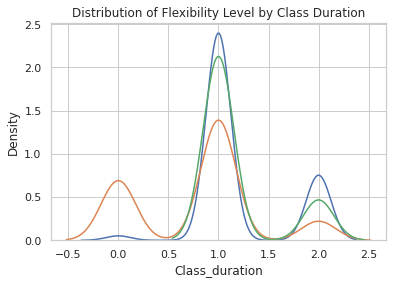

In [ ]:

sns.set(style = 'whitegrid')
plt.title("Distribution of Flexibility Level by Class Duration")
for i in dff['Flexibility_Level'].unique():
    sns.distplot(dff[(dff['Flexibility_Level']==i)]['Class_duration'], hist=False, kde=True, label=i)

**Flexibility_Level vs Age boxplot**

In [ ]:
fig = px.histogram(df, x="Age", color="Flexibility_Level", marginal="box", histnorm='probability density', color_discrete_map={0:'#0D3383',1:'#D81E1F'},barmode='group')
fig.show()

**Class_duration vs Flexibility Level Boxplot**

In [ ]:
fig = px.histogram(dff, x="Class_duration", color="Flexibility_Level", marginal="box", histnorm='probability density', color_discrete_map={0:'#0D3383',1:'#D81E1F'},barmode='group')
fig.show()

In [ ]:
import plotly.graph_objects as go

**Box plot**

In [ ]:
df_column = ['Gender', 'Education Level', 'Institution Type', 'IT Student', 'Internet Type','Network Type','Flexibility_Level','Age Range']
fig = go.Figure()
for i in df_column:
    fig.add_trace(go.Box(y=dff[i], name=i))
fig.show()   

In [ ]:
dff.columns.unique()

Index(['Gender', 'Education Level', 'Institution Type', 'IT Student',
       'Location', 'Load-shedding', 'Financial Condition', 'Internet Type',
       'Network Type', 'Device', 'Flexibility_Level', 'Age Range',
       'Class_duration'],
      dtype='object')

**Distribution of the dataset**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff070e83e90>,
      dtype=object)

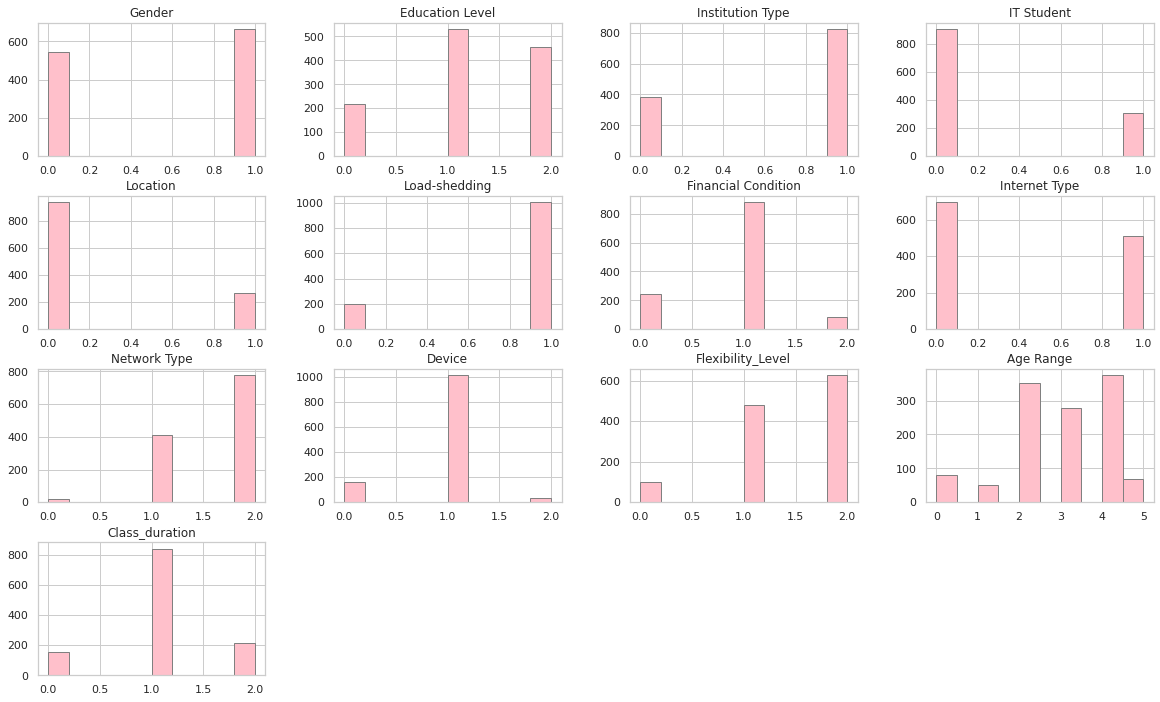

In [ ]:
dff.hist(figsize=(20,12),facecolor='pink',edgecolor='grey')

# **Train_test Split**

In [ ]:
X = dff.drop(['Flexibility_Level'], axis = 1)
y = dff['Flexibility_Level']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=10)
print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (843, 12)
X Test  :  (362, 12)
Y Train :  (843,)
Y Test  :  (362,)


In [ ]:
#Importance of the columns
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline

importances= mutual_info_classif(X_train,y_train)

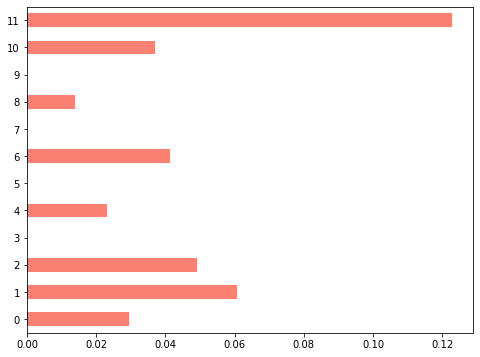

In [ ]:
featureimp=pd.Series(importances)
plt.figure(figsize=(8, 6))
featureimp.plot(kind='barh',color="salmon")

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

**Accuracy** **Prediction**

In [ ]:

#LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,y_train)
LRPred=LR.predict(X_test)
LRAcu=accuracy_score(LRPred,y_test)
#RandomForest
randomForest=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)
randomForest.fit(X_train,y_train)
randomForestPred=randomForest.predict(X_test)
randomForestAcu=accuracy_score(randomForestPred,y_test)
# DecisionTree Classifier
dTree=DecisionTreeClassifier(criterion='entropy',random_state=1)
dTree.fit(X_train,y_train)
dTreePred=dTree.predict(X_test)
dTreeAcu=accuracy_score(dTreePred,y_test)

print('Logistic Regression Accuracy:\t\t',LRAcu*100,'%')
print('RandomForest Accuracy:\t\t',randomForestAcu*100,'%')
print('DecisionTree Accuracy:\t\t',dTreeAcu*100,'%')


Logistic Regression Accuracy:		 67.95580110497238 %
RandomForest Accuracy:		 87.84530386740332 %
DecisionTree Accuracy:		 88.12154696132598 %


**Accuracy Bar plot**

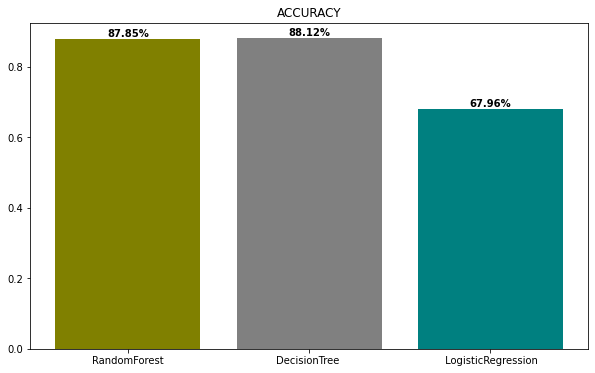

In [ ]:
data = pd.DataFrame({'A':['RandomForest','DecisionTree ',' LogisticRegression'],
                     'B':[randomForestAcu,dTreeAcu,LRAcu]
                    })

percentage = []
for i in range(data.shape[0]):
    pct = (data.B[i]) * 100
    percentage.append(round(pct,2))
data['Percentage'] = percentage

plt.figure(figsize=(10,6))
plt.title("ACCURACY")
colors_list = ['Olive','Gray', 'Teal', 'Purple','maroon']
graph = plt.bar(data.A,data.B, color = colors_list)

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(data.Percentage[i])+'%',
             ha='center',
             weight='bold')
    i+=1
plt.show()

**Precision,Reacall & F1 Scores of the Models**

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
#Random Forest
RF= RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=1)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
#Decision Tree
dt= DecisionTreeClassifier(criterion='entropy',random_state=1)
dt.fit(X_train, y_train)
y_pred1 = dt.predict(X_test)
#Logistic Regression
Lr= LogisticRegression()
Lr.fit(X_train, y_train)
y_pred2 = Lr.predict(X_test)

print(classification_report(y_test,y_pred, zero_division=1))
print(classification_report(y_test,y_pred1, zero_division=1))
print(classification_report(y_test,y_pred2, zero_division=1))


              precision    recall  f1-score   support

           0       0.73      0.73      0.73        30
           1       0.84      0.89      0.87       127
           2       0.90      0.87      0.89       205

    accuracy                           0.87       362
   macro avg       0.83      0.83      0.83       362
weighted avg       0.87      0.87      0.87       362

              precision    recall  f1-score   support

           0       0.69      0.73      0.71        30
           1       0.88      0.89      0.88       127
           2       0.92      0.90      0.91       205

    accuracy                           0.88       362
   macro avg       0.83      0.84      0.83       362
weighted avg       0.88      0.88      0.88       362

              precision    recall  f1-score   support

           0       0.43      0.10      0.16        30
           1       0.63      0.63      0.63       127
           2       0.71      0.80      0.75       205

    accuracy        

**Confusion Matrix of the Models**

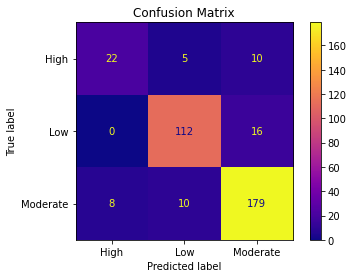

In [ ]:
#Random Forest Confusion Matrix
Conf_mat = confusion_matrix(RF.predict(X_test),y_test)
disp = ConfusionMatrixDisplay(Conf_mat, display_labels=["High","Low","Moderate"])
disp.plot(cmap='plasma')
plt.title("Confusion Matrix")
plt.show()

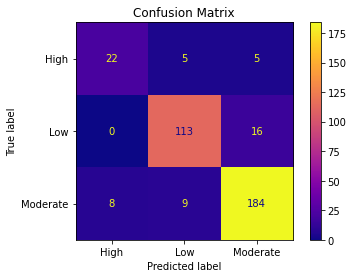

In [ ]:
#Decision Tree Confusion Matrix
Conf_mat1 = confusion_matrix(dt.predict(X_test),y_test)
disp = ConfusionMatrixDisplay(Conf_mat1, display_labels=["High","Low","Moderate"])
disp.plot(cmap='plasma')
plt.title("Confusion Matrix")
plt.show()

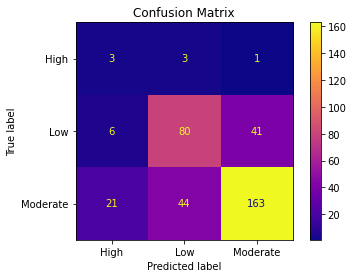

In [ ]:
#Linear Regression Confusion Matrix
Conf_mat2 = confusion_matrix(Lr.predict(X_test),y_test)
disp = ConfusionMatrixDisplay(Conf_mat2, display_labels=["High","Low","Moderate"])
disp.plot(cmap='plasma')
plt.title("Confusion Matrix")
plt.show()

**ROC Curve**

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from itertools import cycle

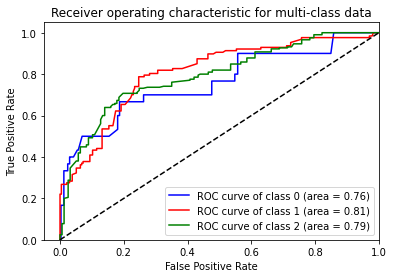

In [ ]:
#LogisticRegression

classifier = LogisticRegression(random_state=0)
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]



fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

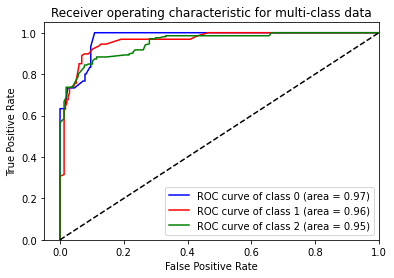

In [ ]:
#RandomForest

classifier = RandomForestClassifier(random_state=0)
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]



fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

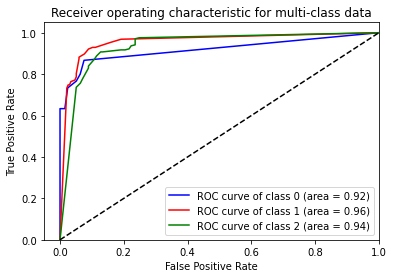

In [ ]:
#DecisionTree

classifier = DecisionTreeClassifier(random_state=0)
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]



fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()